# Image Classification
 
## Get the Data


In [3]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


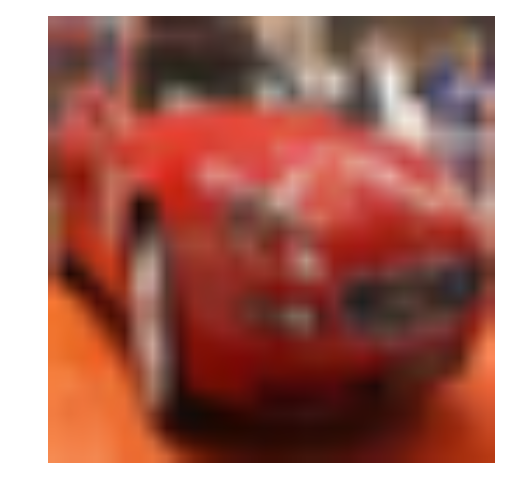

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize


In [5]:

from sklearn.preprocessing import normalize

def normalize(x):
    
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    x_shape = np.shape(x)
    max_val = np.max(x.reshape(1,-1))
    #x_norm = np.reshape(x / np.sum(x),x_shape)
    
    
    
    return x / max_val


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


In [6]:
import numpy as np
norm_vals = normalize(np.random.rand(10,10))
print(norm_vals)


[[ 0.77590712  0.117341    0.11978194  0.75237472  0.87544303  0.65743054
   0.20469115  0.1211383   0.03820646  0.95388142]
 [ 0.13506649  0.7947329   0.55828792  0.37550913  0.24287977  0.61696174
   0.45585902  0.38594285  0.52571121  0.06626719]
 [ 0.97955765  0.94207783  0.60137925  0.0652974   0.5756246   0.63060858
   0.34104173  1.          0.80406264  0.67472202]
 [ 0.53060387  0.01636966  0.79411564  0.30167673  0.05201046  0.38930222
   0.92609853  0.87588336  0.96347733  0.40656642]
 [ 0.31697882  0.19552746  0.72005355  0.5562389   0.26929559  0.50074511
   0.43196882  0.76001653  0.92040137  0.54274308]
 [ 0.87189373  0.95980446  0.79900159  0.85584408  0.82009678  0.21448861
   0.16898494  0.37740762  0.6484284   0.61154365]
 [ 0.83038294  0.8998689   0.00532367  0.76416473  0.26950599  0.75134636
   0.56998971  0.79040349  0.9966791   0.05197212]
 [ 0.8630748   0.51851993  0.78169895  0.53222975  0.51329717  0.11610519
   0.60699066  0.63682206  0.27627614  0.79592349]


### One-hot encode

In [7]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer(sparse_output=False)
lb.fit(range(10))

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
   
    x_one_hot = lb.transform(x)
    
    return x_one_hot





"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [8]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

## Build the network

In [2]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    x = tf.placeholder(tf.float32,shape=[None, image_shape[0],image_shape[1],image_shape[2]],name="x")
    return x


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    y = tf.placeholder(tf.int32,shape=[None, n_classes],name="y")
    return y


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    keep_prob = tf.placeholder(tf.float32,name="keep_prob")
    return keep_prob


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer

In [3]:
import numpy as np

def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    
    x_shape = x_tensor.get_shape().as_list()
        
    std = 0.1 # 1 / np.sqrt(np.prod(x_shape[1:]))
    
    print(std)
    
    weight = tf.Variable(tf.truncated_normal([conv_ksize[0],conv_ksize[1],x_shape[3],conv_num_outputs],mean=0,stddev=std))
    
    print(weight)
    
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    
    conv_layer = tf.nn.conv2d(x_tensor, weight, strides=[1,conv_strides[0],conv_strides[1],1], padding='SAME')
    
    conv_layer = tf.nn.relu(conv_layer + bias)
    
    x_conv_max = tf.nn.max_pool(conv_layer,ksize=[1,pool_ksize[0],pool_ksize[1],1],strides=[1,pool_strides[0],pool_strides[1],1],padding='SAME')
    
    print(x_conv_max)
    
    return x_conv_max


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

0.1
<tf.Variable 'Variable:0' shape=(2, 2, 5, 10) dtype=float32_ref>
Tensor("MaxPool:0", shape=(?, 4, 4, 10), dtype=float32)
Tests Passed


### Flatten Layer

In [4]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    
    shape = x_tensor.get_shape().as_list()        
    dim = np.prod(shape[1:])     
    x_flattened = tf.reshape(x_tensor, [-1, dim])
    
    return x_flattened


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). 

In [5]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    
#    x_flattened = flatten(x_tensor)
    
    x_shape = x_tensor.get_shape().as_list()
    
    std = 0.1 # 1 / np.sqrt(np.prod(x_shape[1:]))
    
    weight = tf.Variable(tf.truncated_normal([x_shape[1],num_outputs],mean=0,stddev = std))
    #print(weight)
    
    bias = tf.Variable(tf.zeros(num_outputs))
    
    x_fully_conn = tf.nn.relu(tf.matmul(x_tensor,weight) + bias)
    
    print(x_fully_conn)
    
    return x_fully_conn


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tensor("Relu_1:0", shape=(?, 40), dtype=float32)
Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). 

In [6]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    
#    x_flattened = flatten(x_tensor)
    
    x_shape = x_tensor.get_shape().as_list()
    
    std = 0.1 # 1 / np.sqrt(np.prod(x_shape[1:]))
    
    weight = tf.Variable(tf.truncated_normal([x_shape[1],num_outputs],mean=0,stddev=std))
    #print(weight)
    
    bias = tf.Variable(tf.zeros(num_outputs))
    
    x_output = tf.add(tf.matmul(x_tensor,weight), bias)
    
    print(x_output)
    
    return x_output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tensor("Add:0", shape=(?, 40), dtype=float32)
Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.

In [7]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    
    
    k_size = [5,5]
    
    k_stride = [1,1]
    
    p_size = [2,2]
    
    p_stride = [2,2]
    
    x = conv2d_maxpool(x, 32, k_size,k_stride,p_size,p_stride)
    
    #k_size = [5,5]
    x = conv2d_maxpool(x, 64, k_size,k_stride,p_size,p_stride)
    
    #k_size = [7,7]
    #x = conv2d_maxpool(x, 128, k_size,k_stride,p_size,p_stride)
    
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   
    
    conv_final=flatten(x)
    
    num_outputs = (np.ceil(float(conv_final.get_shape().as_list()[1])/4)).astype('int')
    
    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   
    
    full = fully_conn(conv_final, 256)
    full = tf.nn.dropout(full, keep_prob)
    
    #full = fully_conn(full, 128) #np.ceil(num_outputs/2).astype('int'))
    #full2 = tf.nn.dropout(full2, keep_prob)
    
    full = fully_conn(full, 64) #np.ceil(num_outputs/8).astype('int'))
    full = tf.nn.dropout(full, keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   
    
    readout = output(full, 10)
    
    print(readout)
    
    # TODO: return output
    return readout


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

0.1
<tf.Variable 'Variable:0' shape=(5, 5, 3, 32) dtype=float32_ref>
Tensor("MaxPool:0", shape=(?, 16, 16, 32), dtype=float32)
0.1
<tf.Variable 'Variable_2:0' shape=(5, 5, 32, 64) dtype=float32_ref>
Tensor("MaxPool_1:0", shape=(?, 8, 8, 64), dtype=float32)
Tensor("Relu_2:0", shape=(?, 256), dtype=float32)
Tensor("Relu_3:0", shape=(?, 64), dtype=float32)
Tensor("Add:0", shape=(?, 10), dtype=float32)
Tensor("Add:0", shape=(?, 10), dtype=float32)
0.1
<tf.Variable 'Variable_10:0' shape=(5, 5, 3, 32) dtype=float32_ref>
Tensor("MaxPool_2:0", shape=(?, 16, 16, 32), dtype=float32)
0.1
<tf.Variable 'Variable_12:0' shape=(5, 5, 32, 64) dtype=float32_ref>
Tensor("MaxPool_3:0", shape=(?, 8, 8, 64), dtype=float32)
Tensor("Relu_6:0", shape=(?, 256), dtype=float32)
Tensor("Relu_7:0", shape=(?, 64), dtype=float32)
Tensor("Add_1:0", shape=(?, 10), dtype=float32)
Tensor("Add_1:0", shape=(?, 10), dtype=float32)
Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.

In [8]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})
    
    pass


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats

In [9]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    
    #print(accuracy.eval(feed_dict = {logits: feature_batch, y: label_batch}))
    valid_accuracy = accuracy.eval(feed_dict={x: valid_features,y: valid_labels,keep_prob: 1.0})
    #train_accuracy = session.run(accuracy, feed_dict={x: feature_batch,y: label_batch,keep_prob: 1})
    #loss = session.run(cost,feed_dict={x: feature_batch,y: label_batch,keep_prob: 1})
    print('Valid accuracy %g' % (valid_accuracy))
    
    
    pass

### Hyperparameters

In [10]:
# TODO: Tune Parameters
epochs = 20
batch_size = 64
keep_probability = 0.75

### Train on a Single CIFAR-10 Batch

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='\n')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...


### Fully Train the Model

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='\n')
            if epoch % 2 == 0:
                print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  
Valid accuracy 0.3302
Epoch  1, CIFAR-10 Batch 2:  
Valid accuracy 0.437
Epoch  1, CIFAR-10 Batch 3:  
Valid accuracy 0.4694
Epoch  1, CIFAR-10 Batch 4:  
Valid accuracy 0.5144
Epoch  1, CIFAR-10 Batch 5:  
Valid accuracy 0.5424
Epoch  2, CIFAR-10 Batch 1:  
Epoch  2, CIFAR-10 Batch 2:  
Epoch  2, CIFAR-10 Batch 3:  
Epoch  2, CIFAR-10 Batch 4:  
Epoch  2, CIFAR-10 Batch 5:  
Epoch  3, CIFAR-10 Batch 1:  
Valid accuracy 0.6072
Epoch  3, CIFAR-10 Batch 2:  
Valid accuracy 0.6198
Epoch  3, CIFAR-10 Batch 3:  
Valid accuracy 0.6296
Epoch  3, CIFAR-10 Batch 4:  
Valid accuracy 0.6352
Epoch  3, CIFAR-10 Batch 5:  
Valid accuracy 0.6422
Epoch  4, CIFAR-10 Batch 1:  
Epoch  4, CIFAR-10 Batch 2:  
Epoch  4, CIFAR-10 Batch 3:  
Epoch  4, CIFAR-10 Batch 4:  
Epoch  4, CIFAR-10 Batch 5:  
Epoch  5, CIFAR-10 Batch 1:  
Valid accuracy 0.6694
Epoch  5, CIFAR-10 Batch 2:  
Valid accuracy 0.674
Epoch  5, CIFAR-10 Batch 3:  
Valid accuracy 0.6738
Epoch  5, CIFA

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6872014331210191



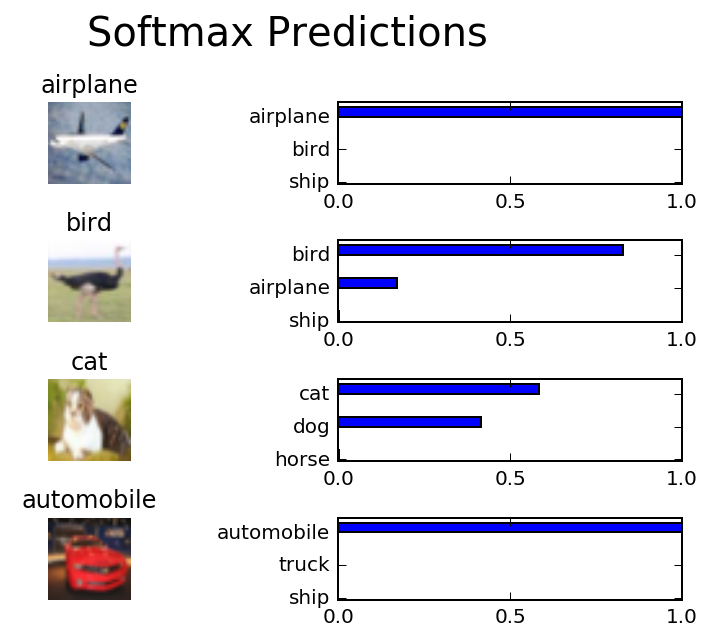

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()